# import necessary package

In [1]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

# Show Image

In [2]:
img_grey = cv2.imread('lenna.jpg' ,0)
cv2.imshow('lenna', img_grey)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
                      

In [3]:
# to show gray image matrix
print(img_grey)

[[174 176 177 ... 184 162 132]
 [175 176 177 ... 189 164 130]
 [176 176 177 ... 187 163 125]
 ...
 [ 12  17  22 ...  95  95  92]
 [  9  16  24 ...  96  98 102]
 [  9  17  26 ...  91  94 103]]


In [4]:
# to show image data shape
print(img_grey.dtype)

uint8


In [5]:
# to show gray image shape
print(img_grey.shape) # 图像大小

(512, 512)


In [6]:
# 查看原始图像
img_ori = cv2.imread('lenna.jpg')
cv2.imshow('lenna', img_ori)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [7]:
# to show color image
print(img_ori)
# to show channels
print(img_ori.shape)

[[[135 159 219]
  [137 161 221]
  [136 161 223]
  ...
  [117 169 240]
  [ 91 146 219]
  [ 59 116 191]]

 [[136 160 220]
  [135 161 221]
  [136 161 223]
  ...
  [125 174 242]
  [ 97 149 219]
  [ 61 115 186]]

 [[135 160 222]
  [133 161 222]
  [134 162 223]
  ...
  [130 173 236]
  [103 149 213]
  [ 65 111 175]]

 ...

 [[  5  12  15]
  [ 10  17  20]
  [ 13  22  26]
  ...
  [ 51  76 148]
  [ 47  74 154]
  [ 41  71 152]]

 [[  2   9  12]
  [  9  16  19]
  [ 15  24  28]
  ...
  [ 50  76 152]
  [ 48  76 160]
  [ 49  80 165]]

 [[  2   9  12]
  [ 10  17  20]
  [ 17  26  30]
  ...
  [ 45  71 148]
  [ 43  72 157]
  [ 50  80 167]]]
(512, 512, 3)


# Image Crop

In [8]:
img_crop = img_ori[0:100, 0:200]
cv2.imshow('img_crop', img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

# Image Split 

In [9]:
B, G, R = cv2.split(img_ori)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

# Change Color

In [10]:
def random_light_color(img):
    """
        随机改变各个波段的灰度值，达到改变颜色的目的
    """
    # brightness
    B, G, R = cv2.split(img)
    
    b_rand =random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
        
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
    
    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
    
    img_merge = cv2.merge((B, G, R))    
    return img_merge

In [11]:
img_random_color = random_light_color(img_ori)
cv2.imshow('img_random_color', img_random_color)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

#  gamma correction 伽马校正

In [12]:
img_dark = cv2.imread('lenna.jpg')
cv2.imshow('img_dark', img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [13]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark, table)

In [14]:
img_brighter = adjust_gamma(img_dark, 2)
cv2.imshow('img_dark', img_dark)
cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

# histogram 直方图

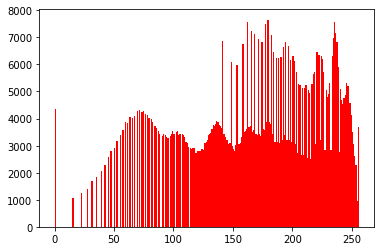

In [15]:
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color='r')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)

In [16]:
# equalize the histogram of the Y channel 均衡Y通道的直方图
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0]) # only for 1 channel

In [17]:
# convert the YUV image back to RGB format 将YUV图像转换回RGB格式
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

# rotation

In [18]:
M = cv2.getRotationMatrix2D((img_ori.shape[1] / 2, img_ori.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img_ori, M, (img_ori.shape[1], img_ori.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [19]:
# set M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img_ori, M, (img_ori.shape[1], img_ori.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key == cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]


In [21]:
# scale+rotation+translation = similarity transform
M = cv2.getRotationMatrix2D((img_ori.shape[1] / 2, img_ori.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img_ori, M, (img_ori.shape[1], img_ori.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[  0.4330127    0.25        81.14874832]
 [ -0.25         0.4330127  209.14874832]]


# Affine Transform  仿射变换


In [22]:
rows, cols, ch = img_ori.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_ori, M, (cols, rows))
cv2.imshow('affine lenna', dst)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

# perspective transform


In [27]:
def random_warp(img, row, col):
    height, width, channels = img_ori.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img_ori, img_ori.shape[0], img_ori.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
	
